In [1]:
%run notebook_setup.py

In [2]:
sys.path.append('../..')

In [3]:
from standardiser import break_bonds, unsalt, neutralise, rules

In [4]:
for module in [break_bonds, unsalt, neutralise, rules]: module.logger.setLevel('DEBUG')

# `standardise`: get standardised parent

### Introduction

This notebook provides simple examples of the use of the individual modules in the **`standardise`** package in a 'bare bones' alternative workflow.

TODO: add further examples and some commentary

### Examples

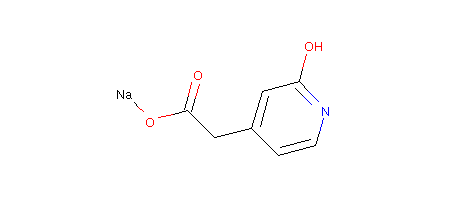

In [5]:
mol = Chem.MolFromSmiles("[Na]OC(=O)Cc1cc(O)ncc1")

mol

[2016/May/13 12:36:57 DEBUG   ] Broke 1 bonds to Group I and II metals


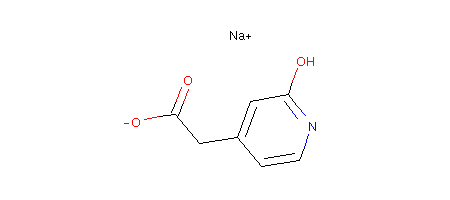

In [6]:
mol = break_bonds.apply(mol)

mol

[2016/May/13 12:36:57 DEBUG   ] Fragment contains a non-organic element


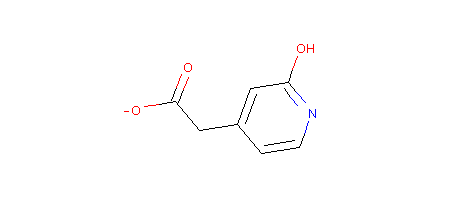

In [7]:
mol = [x for x in Chem.GetMolFrags(mol, asMols=True) if not unsalt.is_nonorganic(x)][0]

mol

[2016/May/13 12:36:57 DEBUG   ] 0 positive/H, 0 positive/quat and 1 negative (of which 1 are acid) charges identified
[2016/May/13 12:36:57 DEBUG   ] Overall H balance: +1; formal charge: 0


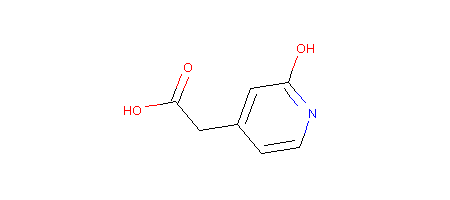

In [8]:
mol = neutralise.apply(mol)

mol

[2016/May/13 12:36:57 DEBUG   ] apply> mol = 'O=C(O)Cc1ccnc(O)c1'
[2016/May/13 12:36:57 DEBUG   ] apply> starting pass 1...
[2016/May/13 12:36:57 DEBUG   ] rule 2 '2-hydroxy pyridine -> 2-pyridone' applied on pass 1
[2016/May/13 12:36:57 DEBUG   ] ...total of 1 hits in pass: will continue...
[2016/May/13 12:36:57 DEBUG   ] apply> starting pass 2...
[2016/May/13 12:36:57 DEBUG   ] ...total of 0 hits in pass: finished.


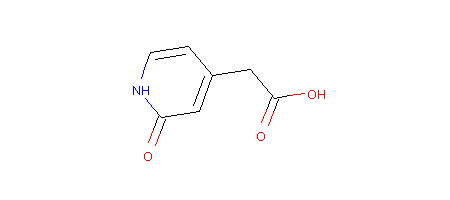

In [9]:
mol = rules.apply(mol)

mol